In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.compose import ColumnTransformer 

In [2]:
#import data
df = pd.read_csv('data.csv', header = 1)
#creat a new label
df['dav/de'] = df['dav'] / (2 * df['W'] * df['H'] / (df['W'] + df['H']))

In [3]:
pd.set_option('display.max_columns', None)
#descriptive information about the original dataset
df.describe()

,curvature,W,H,L,A3,A1,W/H,A2/A1,density_D,density_C,viscosity_D,viscosity_C,interfacial_tension,viscosity_ratio,QD,QC,ud,uc,QD/QC,ud/uc,shear_force_C,dav,dav/de
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,0.288116,0.498428,0.380705,0.339436,0.028419,0.194808,1.357043,0.662207,916.770912,835.788345,25.448969,15.568720,14.019476,3.176068,50.036662,911.238023,0.086173,0.135206,0.220429,2.266908,1.620230,0.268728,0.664282
std,0.499047,0.120584,0.102150,0.199733,0.050365,0.100823,0.392357,0.317510,141.184689,127.935399,49.451658,25.637275,14.657727,5.996805,36.923276,1531.981305,0.106142,0.201547,0.431367,6.261924,2.901241,0.123586,0.321480
min,0.000000,0.312550,0.292500,0.086000,0.004418,0.114081,0.856301,0.195455,653.000000,674.000000,0.310000,0.901070,3.120000,0.006259,1.000000,10.000000,0.000076,0.001461,0.000333,0.000204,0.015729,0.016567,0.022090
25%,0.000000,0.375000,0.328567,0.176400,0.007854,0.136875,1.000000,0.360548,695.350000,760.000000,0.595000,3.200000,5.130000,0.036144,25.000000,200.000000,0.020723,0.034188,0.040833,0.292765,0.137798,0.180211,0.463746
50%,0.000000,0.520800,0.365000,0.280000,0.020106,0.167680,1.205479,0.500000,997.044000,820.300000,0.890000,8.200000,6.940000,0.266287,50.000000,500.000000,0.041447,0.073847,0.087500,0.775435,0.459422,0.260000,0.637882
75%,0.666667,0.600000,0.365000,0.581000,0.020106,0.189106,1.774372,1.000000,998.000000,995.948512,6.350000,24.759144,11.540000,0.774390,50.000000,1000.000000,0.106103,0.141015,0.250000,2.152534,1.831943,0.343110,0.830956
max,1.333333,0.750000,0.750000,0.633027,0.220618,0.562500,2.082010,1.000000,1008.700000,1130.000000,136.070000,142.200000,41.710000,16.593902,160.000000,12000.000000,0.530517,1.481481,8.000000,181.565219,27.334805,0.954036,2.833112


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   剪切方式                 1983 non-null   object 
 1   设备类型                 1983 non-null   object 
 2   curvature            1983 non-null   float64
 3   W                    1983 non-null   float64
 4   H                    1983 non-null   float64
 5   L                    1983 non-null   float64
 6   A3                   1983 non-null   float64
 7   A1                   1983 non-null   float64
 8   W/H                  1983 non-null   float64
 9   A2/A1                1983 non-null   float64
 10  density_D            1983 non-null   float64
 11  density_C            1983 non-null   float64
 12  viscosity_D          1983 non-null   float64
 13  viscosity_C          1983 non-null   float64
 14  interfacial_tension  1983 non-null   float64
 15  viscosity_ratio      1983 non-null   f

In [5]:
#Detecting the presence of duplicate data
df.duplicated().sum() 

0

In [6]:
#Detecting the presence of missing values
df.isnull().sum() 

剪切方式                   0
设备类型                   0
curvature              0
W                      0
H                      0
L                      0
A3                     0
A1                     0
W/H                    0
A2/A1                  0
density_D              0
density_C              0
viscosity_D            0
viscosity_C            0
interfacial_tension    0
viscosity_ratio        0
QD                     0
QC                     0
ud                     0
uc                     0
QD/QC                  0
ud/uc                  0
shear_force_C          0
dav                    0
dav/de                 0
dtype: int64

In [7]:
category_cols = ['剪切方式', '设备类型']
numeric_cols = ['curvature', 'W', 'H', 'L', 'A3', 'A1', 'W/H', 'A2/A1',
                'density_D', 'density_C', 'viscosity_D', 'viscosity_C', 
                'interfacial_tension', 'viscosity_ratio', 'QD', 'QC',  
                'ud', 'uc', 'QD/QC', 'ud/uc', 'shear_force_C']
target = ['dav/de']

In [8]:
df[numeric_cols].astype(float)
df[df['QD']<5]
df = df.loc[~((1.2 * df.W) < df.dav)]
df = df.loc[~((1.2 * df.H) < df.dav)]
df = df.loc[~(df['ud/uc']>50)]
df = df.loc[~(df['QD/QC']>2)]
df = df.loc[~(df['设备类型'] == "常规T型")]
del df['dav']
df

,剪切方式,设备类型,curvature,W,H,L,A3,A1,W/H,A2/A1,density_D,density_C,viscosity_D,viscosity_C,interfacial_tension,viscosity_ratio,QD,QC,ud,uc,QD/QC,ud/uc,shear_force_C,dav/de
1,错流,毛细管嵌入T型,0.000000,0.584949,0.319844,0.584949,0.020106,0.187092,1.828857,1.0,978.9,819.3,0.87,4.66,5.59,0.186695,25.0,200,0.020723,0.017817,0.125000,1.163152,0.083025,0.784330
2,错流,毛细管嵌入T型,0.000000,0.584949,0.319844,0.584949,0.020106,0.187092,1.828857,1.0,978.9,819.3,0.87,4.66,5.59,0.186695,25.0,400,0.020723,0.035633,0.062500,0.581576,0.166050,0.625920
3,错流,毛细管嵌入T型,0.000000,0.584949,0.319844,0.584949,0.020106,0.187092,1.828857,1.0,978.9,819.3,0.87,4.66,5.59,0.186695,25.0,600,0.020723,0.053450,0.041667,0.387717,0.249075,0.556680
4,错流,毛细管嵌入T型,0.000000,0.584949,0.319844,0.584949,0.020106,0.187092,1.828857,1.0,978.9,819.3,0.87,4.66,5.59,0.186695,25.0,800,0.020723,0.071266,0.031250,0.290788,0.332100,0.517720
5,错流,毛细管嵌入T型,0.000000,0.584949,0.319844,0.584949,0.020106,0.187092,1.828857,1.0,978.9,819.3,0.87,4.66,5.59,0.186695,25.0,1000,0.020723,0.089083,0.025000,0.232630,0.415125,0.476196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,错流,外弯曲通道,1.333333,0.544884,0.339021,0.544884,0.020106,0.184727,1.607228,1.0,980.1,819.1,0.85,7.83,7.55,0.108557,150.0,600,0.124340,0.054134,0.250000,2.296893,0.423868,0.734486
1979,错流,外弯曲通道,1.333333,0.544884,0.339021,0.544884,0.020106,0.184727,1.607228,1.0,980.1,819.1,0.85,7.83,7.55,0.108557,150.0,800,0.124340,0.072179,0.187500,1.722670,0.565158,0.653142
1980,错流,外弯曲通道,1.333333,0.544884,0.339021,0.544884,0.020106,0.184727,1.607228,1.0,980.1,819.1,0.85,7.83,7.55,0.108557,150.0,1000,0.124340,0.090223,0.150000,1.378136,0.706447,0.622040
1981,错流,外弯曲通道,1.333333,0.544884,0.339021,0.544884,0.020106,0.184727,1.607228,1.0,980.1,819.1,0.85,7.83,7.55,0.108557,150.0,1200,0.124340,0.108268,0.125000,1.148447,0.847737,0.588546


In [9]:
#one-hot
enc = preprocessing.OneHotEncoder()
preprocess_col = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols),
    ('num', 'passthrough', numeric_cols), 
    ('tar', 'passthrough', target)
     ])
preprocess_col.fit(df)

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                 ['剪切方式', '设备类型']),
                                ('num', 'passthrough',
                                 ['curvature', 'W', 'H', 'L', 'A3', 'A1', 'W/H',
                                  'A2/A1', 'density_D', 'density_C',
                                  'viscosity_D', 'viscosity_C',
                                  'interfacial_tension', 'viscosity_ratio',
                                  'QD', 'QC', 'ud', 'uc', 'QD/QC', 'ud/uc',
                                  'shear_force_C']),
                                ('tar', 'passthrough', ['dav/de'])])

In [10]:
df1 = pd.DataFrame(preprocess_col.transform(df))
df1.shape

(1797, 27)

In [11]:
#ANOVA
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.001)
df1 = VarianceThreshold(threshold=0.001).fit_transform(df1)
df1.shape

(1797, 27)

In [12]:
def cate_colName(Transformer, category_cols, drop='if_binary'):
    cate_cols_new = []
    col_value = Transformer.categories_
    
    for i, j in enumerate(category_cols):
        if (drop == 'if_binary') & (len(col_value[i]) == 2):
            cate_cols_new.append(j)
        else:
            for f in col_value[i]:
                feature_name = j + '_' + f
                cate_cols_new.append(feature_name)
    return(cate_cols_new)

In [13]:
category_cols_new = cate_colName(preprocess_col.named_transformers_['cat'], category_cols)
cols_new = category_cols_new + numeric_cols + target
df2 = pd.DataFrame(df1, columns=cols_new)

In [15]:
df2.rename(columns={'剪切方式':'method',
                   '设备类型_内弯曲通道':'device1',
                    '设备类型_外弯曲通道':'device2',
                    '设备类型_毛细管嵌入T型':'device3',
                    '设备类型_毛细管嵌入阶梯T型':'device4',
                    'curvature':'curvature',
                    'W':'$W$',
                    'H':'$H$',
                    'L':'$L$',
                    'A3':'$A{_3}$',
                    'A1':'$A{_1}$',
                    'W/H':'$W$$/$$H$',
                   'A2/A1':'$A{_2}$$/$$A{_1}$',
                   'density_C':'${\\rho}_\mathrm{c}$',
                   'density_D':'${\\rho}_\mathrm{d}$',
                   'viscosity_D':'$\mu_\mathrm{d}$',
                   'viscosity_C':'$\mu_\mathrm{c}$',
                   'viscosity_ratio':'$\mu_\mathrm{d}$$/$$\mu_\mathrm{c}$',
                   'interfacial_tension':'$\gamma$',
                   'QD':'$Q_\mathrm{d}$',
                   'QC':'$Q_\mathrm{c}$',
                   'ud':'$u_\mathrm{d}$',
                   'uc':'$u_\mathrm{c}$',
                   'QD/QC':'$Q_\mathrm{d}$$/$$Q_\mathrm{c}$',
                   'ud/uc':'$u_\mathrm{d}$$/$$u_\mathrm{c}$',
                   'shear_force_C':'$\mu_\mathrm{c}$$u_\mathrm{c}$',
                   'dav/de':'$d_\mathrm{av}$$/$$d_\mathrm{e}$'},
                   inplace=True)

In [16]:
pd.set_option('display.float_format',lambda X:'%.8f'% X)
df2.describe()

,method,device1,device2,device3,device4,curvature,$W$,$H$,$L$,$A{_3}$,$A{_1}$,$W$$/$$H$,$A{_2}$$/$$A{_1}$,${\rho}_\mathrm{d}$,${\rho}_\mathrm{c}$,$\mu_\mathrm{d}$,$\mu_\mathrm{c}$,$\gamma$,$\mu_\mathrm{d}$$/$$\mu_\mathrm{c}$,$Q_\mathrm{d}$,$Q_\mathrm{c}$,$u_\mathrm{d}$,$u_\mathrm{c}$,$Q_\mathrm{d}$$/$$Q_\mathrm{c}$,$u_\mathrm{d}$$/$$u_\mathrm{c}$,$\mu_\mathrm{c}$$u_\mathrm{c}$,$d_\mathrm{av}$$/$$d_\mathrm{e}$
count,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000,1797.00000000
mean,0.81969950,0.13745131,0.11630495,0.30495270,0.44129104,0.25969208,0.50013946,0.38523032,0.32838198,0.02723395,0.19851485,1.34514201,0.63699288,918.85948163,837.98514672,27.89107390,15.50156639,13.36652198,3.47532326,47.53906511,984.67445743,0.08517314,0.14663896,0.15618423,1.60375628,1.73917252,0.59916303
std,0.38454456,0.34441902,0.32067949,0.46051554,0.49667951,0.47592973,0.11896472,0.10585832,0.19844975,0.05102470,0.10462134,0.37554385,0.31515982,140.92386250,126.65467108,51.22404163,26.35444544,14.12014584,6.20996880,35.28133381,1590.11818007,0.10400095,0.20822023,0.21392677,2.71558210,3.01043382,0.23960098
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.31255000,0.29250000,0.08600000,0.00441786,0.11408075,0.85630137,0.19545455,653.00000000,674.00000000,0.31000000,0.90107025,3.12000000,0.00625879,1.00000000,10.00000000,0.00007550,0.00319315,0.00033333,0.00020397,0.01997619,0.02209000
25%,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.39500000,0.32856700,0.16300000,0.00785398,0.14417500,1.00000000,0.36054794,978.90000000,773.30000000,0.85000000,3.20000000,5.13000000,0.04769231,25.00000000,210.00000000,0.02072330,0.03858769,0.03333333,0.28023663,0.16677989,0.44016264
50%,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.44000000,0.36500000,0.20000000,0.02010619,0.16060000,1.20547945,0.46666667,997.50000000,820.30000000,0.89000000,8.20000000,6.94000000,0.26628664,40.00000000,600.00000000,0.04144660,0.08539098,0.08333333,0.68257579,0.52367724,0.61201198
75%,1.00000000,0.00000000,0.00000000,1.00000000,1.00000000,0.66666667,0.60000000,0.36500000,0.58100000,0.02010619,0.19155456,1.68539326,1.00000000,1004.30000000,918.00000000,17.70000000,8.20000000,9.08000000,2.15853658,50.00000000,1000.00000000,0.10610329,0.14746499,0.17105263,1.67303665,2.08016236,0.77826332
max,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.33333333,0.75000000,0.75000000,0.63302700,0.22061834,0.56250000,2.08201026,1.00000000,1008.70000000,1130.00000000,136.07000000,142.20000000,41.71000000,16.59390244,160.00000000,12000.00000000,0.53051650,1.48148148,1.75000000,41.30954098,27.33480452,1.16534247


In [17]:
df.rename(columns={'剪切方式':'method',
                   '设备类型':'microchannel structure',
                    'curvature':'curvature',
                    'W':'$W$',
                    'H':'$H$',
                    'L':'$L$',
                    'A3':'$A{_3}$',
                    'A1':'$A{_1}$',
                    'W/H':'$W$$/$$H$',
                   'A2/A1':'$A{_2}$$/$$A{_1}$',
                   'density_C':'${\\rho}_\mathrm{c}$',
                   'density_D':'${\\rho}_\mathrm{d}$',
                   'viscosity_D':'$\mu_\mathrm{d}$',
                   'viscosity_C':'$\mu_\mathrm{c}$',
                   'viscosity_ratio':'$\mu_\mathrm{d}$$/$$\mu_\mathrm{c}$',
                   'interfacial_tension':'$\gamma$',
                   'QD':'$Q_\mathrm{d}$',
                   'QC':'$Q_\mathrm{c}$',
                   'ud':'$u_\mathrm{d}$',
                   'uc':'$u_\mathrm{c}$',
                   'QD/QC':'$Q_\mathrm{d}$$/$$Q_\mathrm{c}$',
                   'ud/uc':'$u_\mathrm{d}$$/$$u_\mathrm{c}$',
                   'shear_force_C':'$\mu_\mathrm{c}$$u_\mathrm{c}$',
                   'dav/de':'$d_\mathrm{av}$$/$$d_\mathrm{e}$'},
                   inplace=True)
df = df.replace({'错流':'Cross-flow', '对撞':'Collisional-flow',
            '内弯曲通道':'device1',
            '外弯曲通道':'device2',
            '毛细管嵌入T型':'device3',
            '毛细管嵌入阶梯T型':'device4',})

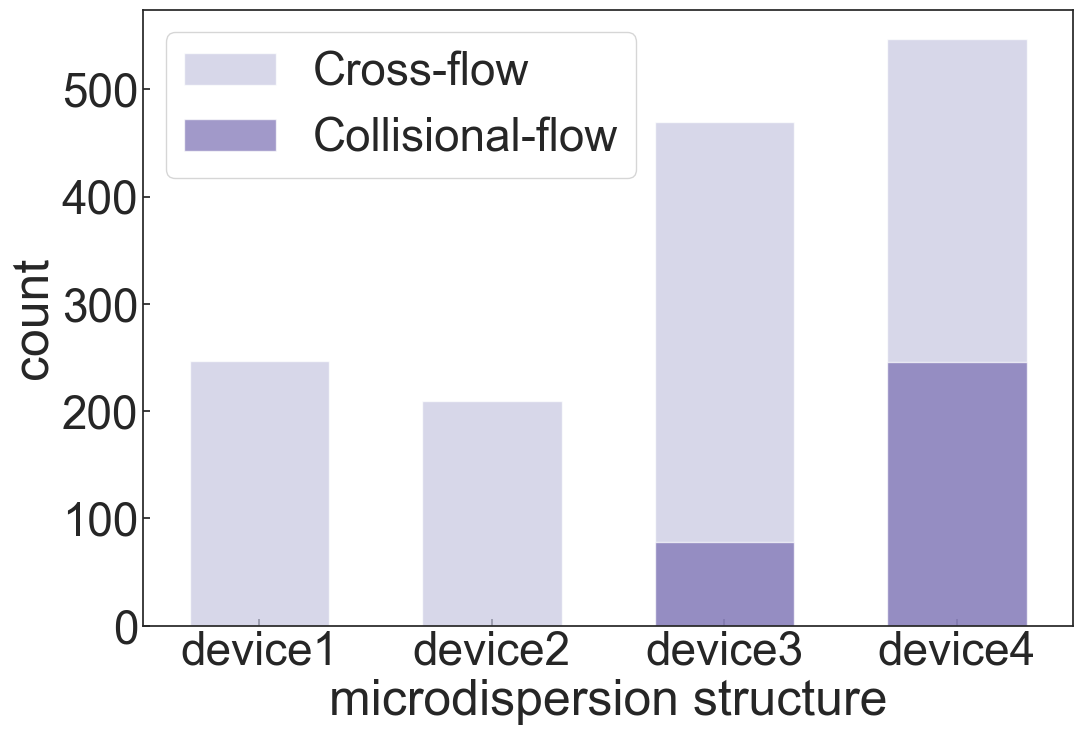

In [18]:
#statistical analysis
plt.figure(figsize=(12,8), dpi=100)
rc = {'font.sans-serif': 'Arial'}
sns.set(context='notebook', style='ticks', rc=rc, font_scale = 3)
plt.tick_params(which='both', direction='in', length=5)
sns.countplot(x="microchannel structure", hue="method", data=df, 
              palette="Purples", dodge=False, saturation=1, width=0.6,
              alpha=0.7, order=["device1", "device2", "device3", "device4"])
plt.xlabel("microdispersion structure")
plt.ylabel("count")
plt.legend(loc = "upper left")

<Axes: >

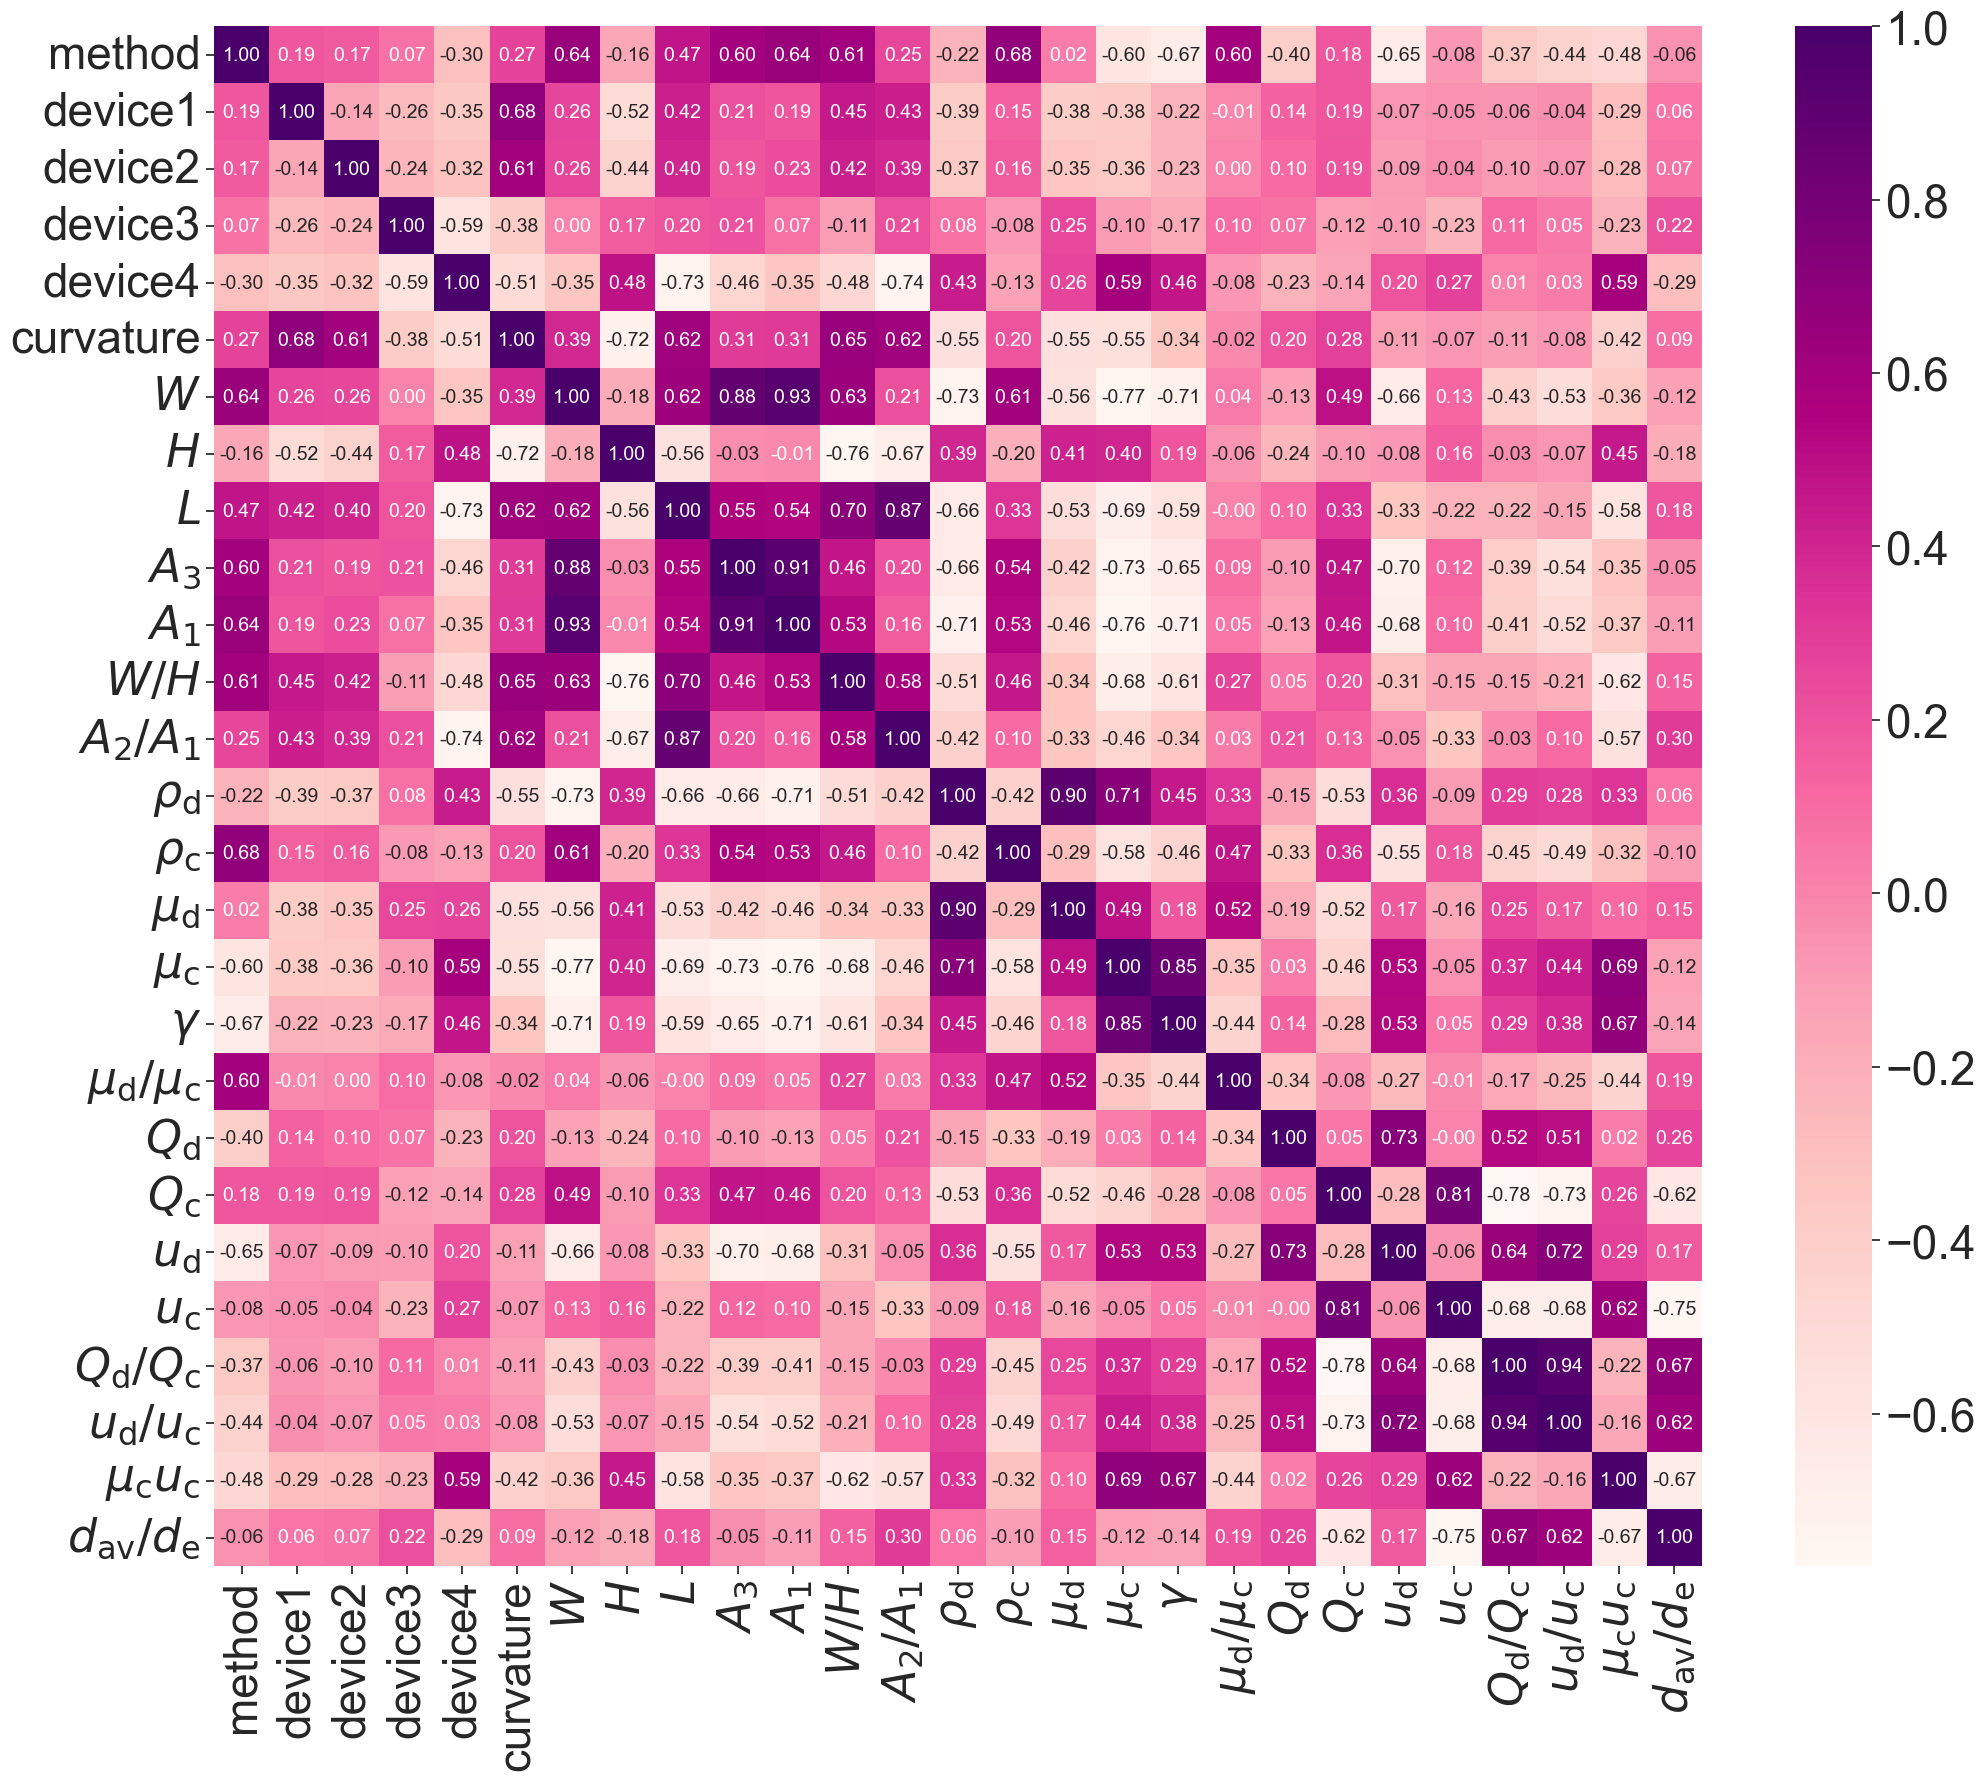

In [19]:
#spearman
corr = df2.corr(method='spearman') 
plt.figure(figsize=(24,20),dpi=100)
sns.heatmap(corr, cmap='RdPu', annot=True, annot_kws={'size':14}, fmt='.2f')

In [20]:
df3 = df2.copy()
df3.rename(columns={'method':'method',
                   'device1':'device1',
                    'device2':'device2',
                    'device3':'device3',
                    'device4':'device4',
                    'curvature':'curvature',
                    '$W$':'$W$(mm)',
                    '$H$':'$H$(mm)',
                    '$L$':'$L$(mm)',
                    '$A{_3}$':'$A{_3}$(mm$^2$)',
                    '$A{_1}$':'$A{_1}$(mm$^2$)',
                    '$W$$/$$H$':'$W$$/$$H$',
                   '$A{_2}$$/$$A{_1}$':'$A{_2}$$/$$A{_1}$',
                   '${\\rho}_\mathrm{c}$':'${\\rho}_\mathrm{c}$(kg/m$^3$)',
                   '${\\rho}_\mathrm{d}$':'${\\rho}_\mathrm{d}$(kg/m$^3$)',
                   '$\mu_\mathrm{d}$':'$\mu_\mathrm{d}$(mPa·s)',
                   '$\mu_\mathrm{c}$':'$\mu_\mathrm{c}$(mPa·s)',
                   '$\mu_\mathrm{d}$$/$$\mu_\mathrm{c}$':'$\mu_\mathrm{d}$$/$$\mu_\mathrm{c}$',
                   '$\gamma$':'$\gamma$(mN/m)',
                   '$Q_\mathrm{d}$':'$Q_\mathrm{d}$(μl/min)',
                   '$Q_\mathrm{c}$':'$Q_\mathrm{c}$(μl/min)',
                   '$u_\mathrm{d}$':'$u_\mathrm{d}$(m/s)',
                   '$u_\mathrm{c}$':'$u_\mathrm{c}$(m/s)',
                   '$Q_\mathrm{d}$$/$$Q_\mathrm{c}$':'$Q_\mathrm{d}$$/$$Q_\mathrm{c}$',
                   '$u_\mathrm{d}$$/$$u_\mathrm{c}$':'$u_\mathrm{d}$$/$$u_\mathrm{c}$',
                   '$\mu_\mathrm{c}$$u_\mathrm{c}$':'$\mu_\mathrm{c}$$u_\mathrm{c}$(mN/m)',
                   '$d_\mathrm{av}$$/$$d_\mathrm{e}$':'$d_\mathrm{av}$$/$$d_\mathrm{e}$'},
                   inplace=True)
x_labels = ['method','device1','device2','device3','device4','curvature','$W$(mm)', '$H$(mm)','$W$$/$$H$', '$L$(mm)',  '$A{_1}$(mm$^2$)','$A{_3}$(mm$^2$)', 
            '$A{_2}$$/$$A{_1}$', '${\\rho}_\mathrm{c}$(kg/m$^3$)', '${\\rho}_\mathrm{d}$(kg/m$^3$)',
            '$\mu_\mathrm{d}$(mPa·s)', '$\mu_\mathrm{c}$(mPa·s)', '$\mu_\mathrm{d}$$/$$\mu_\mathrm{c}$',
            '$\gamma$(mN/m)', '$Q_\mathrm{d}$(μl/min)', '$Q_\mathrm{c}$(μl/min)', '$u_\mathrm{d}$(m/s)',
            '$u_\mathrm{c}$(m/s)', '$Q_\mathrm{d}$$/$$Q_\mathrm{c}$', '$u_\mathrm{d}$$/$$u_\mathrm{c}$',
            '$\mu_\mathrm{c}$$u_\mathrm{c}$(mN/m)', '$d_\mathrm{av}$$/$$d_\mathrm{e}$']
df4 = df3[x_labels]

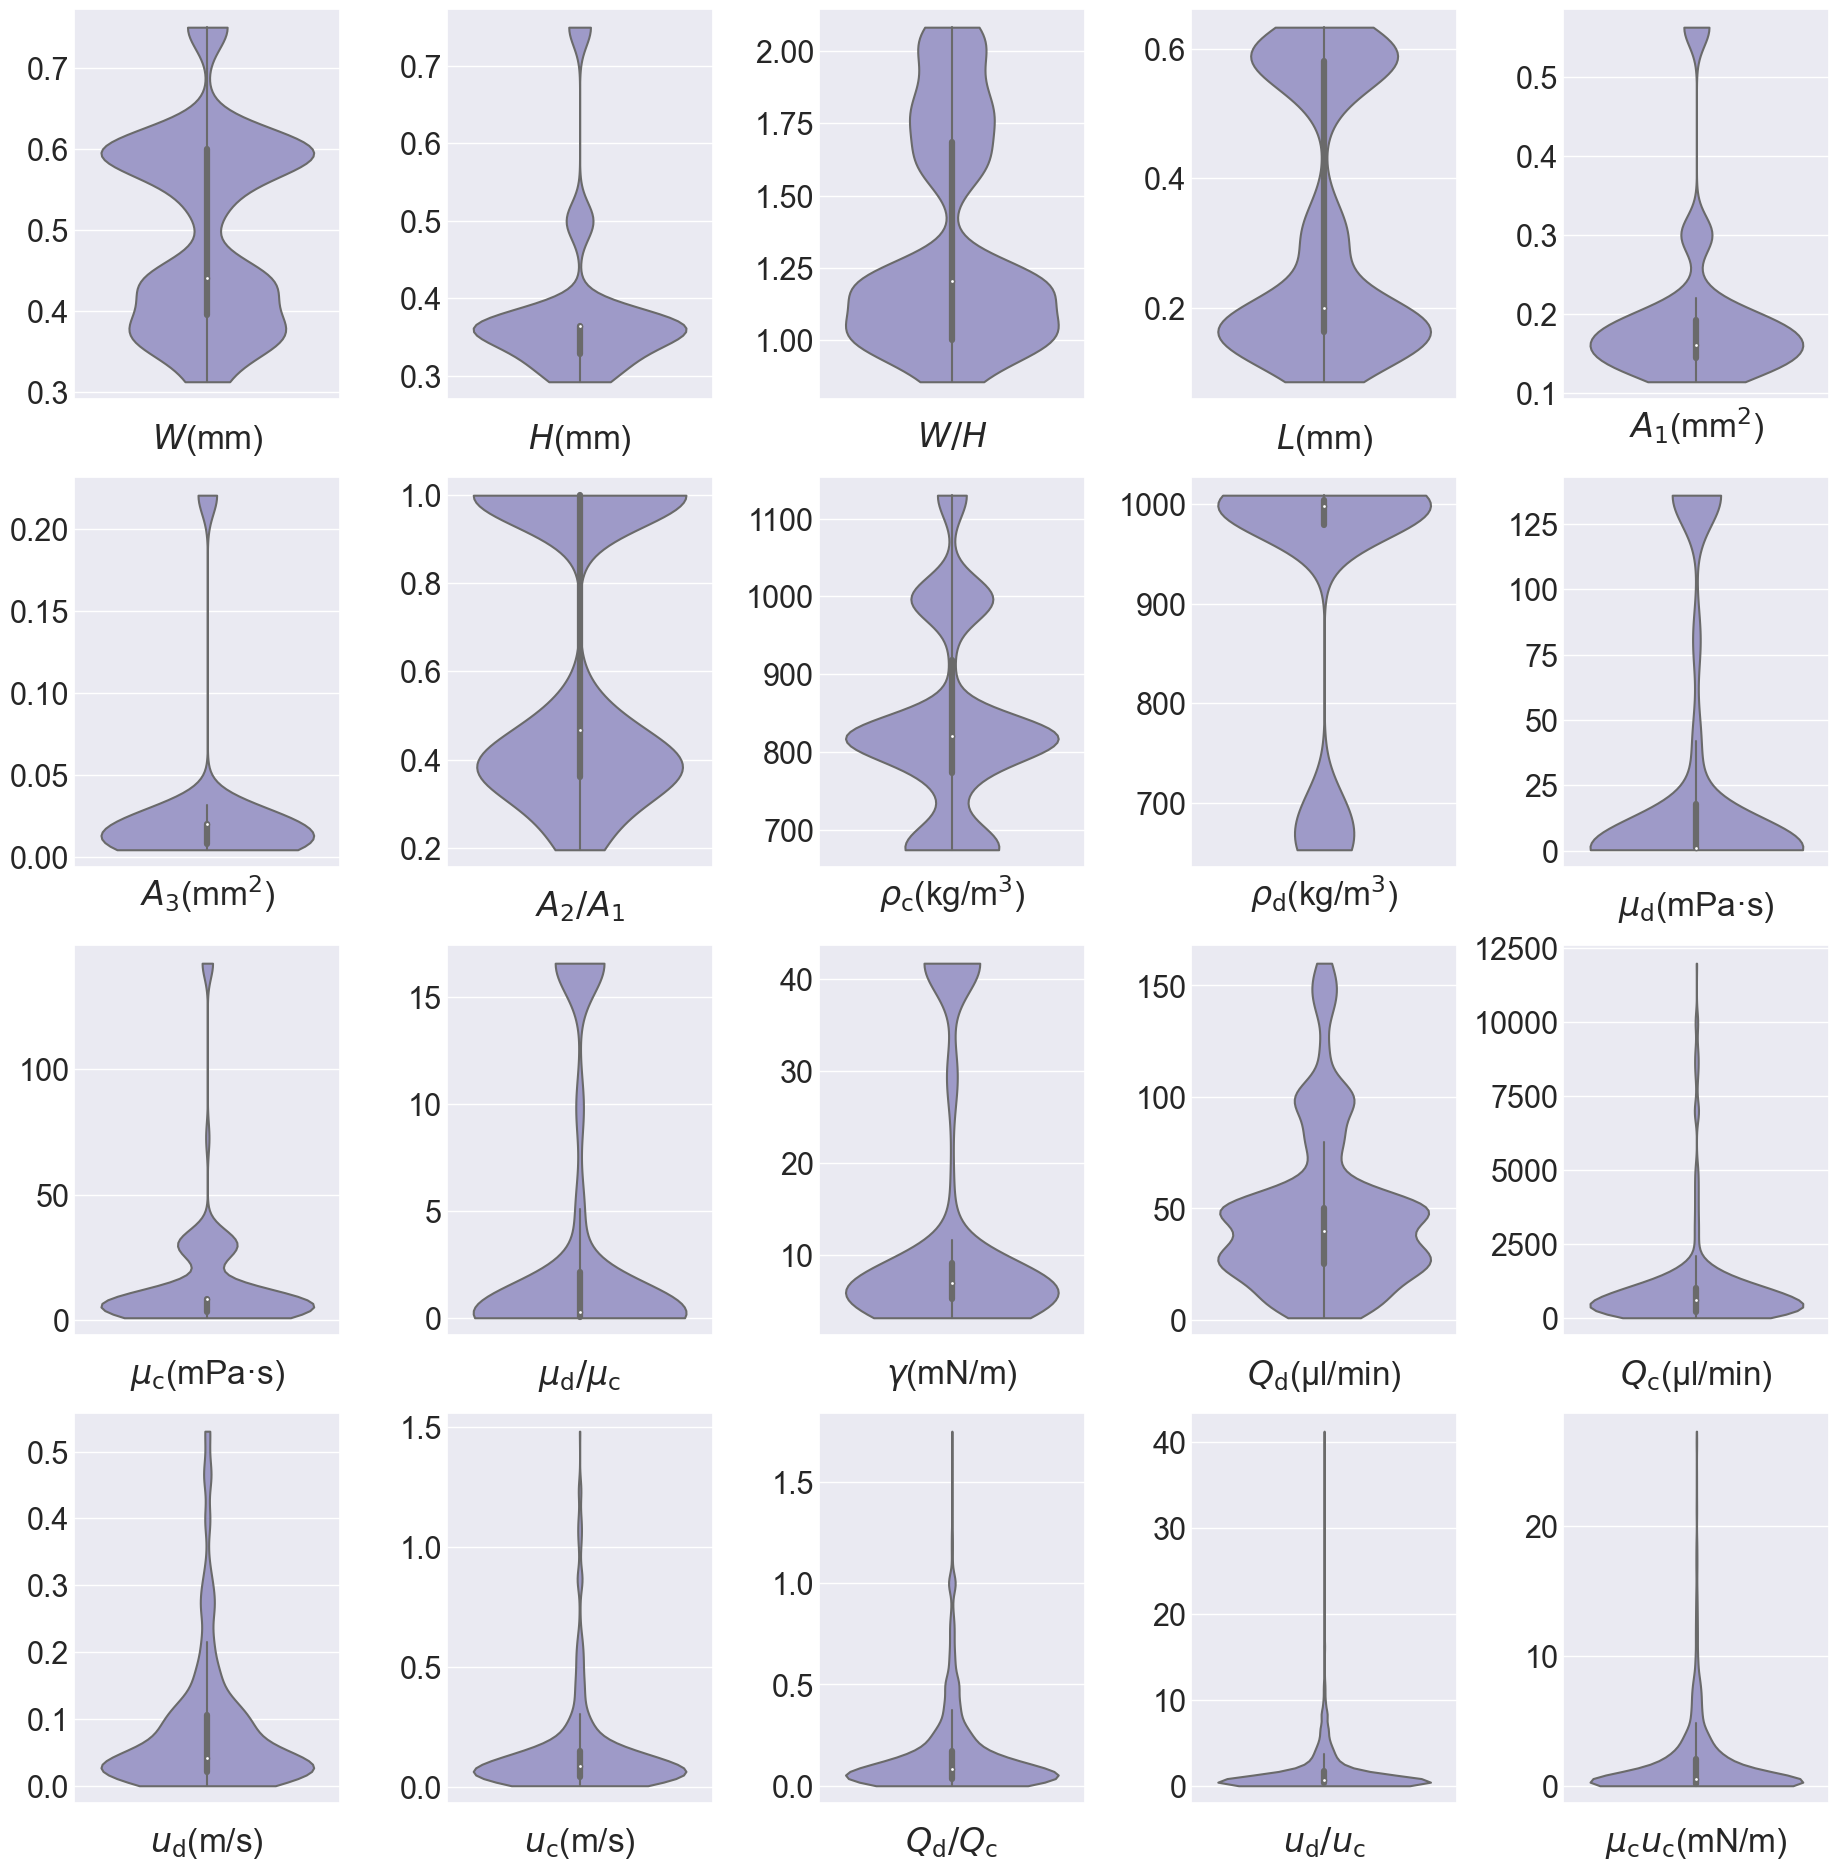

In [21]:
#Violin Figure
fig = plt.figure(figsize =(27, 23),
           dpi=100)
x_labels = ['$W$(mm)', '$H$(mm)','$W$$/$$H$', '$L$(mm)',  '$A{_1}$(mm$^2$)','$A{_3}$(mm$^2$)', 
            '$A{_2}$$/$$A{_1}$', '${\\rho}_\mathrm{c}$(kg/m$^3$)', '${\\rho}_\mathrm{d}$(kg/m$^3$)',
            '$\mu_\mathrm{d}$(mPa·s)', '$\mu_\mathrm{c}$(mPa·s)', '$\mu_\mathrm{d}$$/$$\mu_\mathrm{c}$',
            '$\gamma$(mN/m)', '$Q_\mathrm{d}$(μl/min)', '$Q_\mathrm{c}$(μl/min)', '$u_\mathrm{d}$(m/s)',
            '$u_\mathrm{c}$(m/s)', '$Q_\mathrm{d}$$/$$Q_\mathrm{c}$', '$u_\mathrm{d}$$/$$u_\mathrm{c}$',
            '$\mu_\mathrm{c}$$u_\mathrm{c}$(mN/m)']
for i,j in enumerate(df4.columns.tolist()[6:-1]):
    sns.set(font_scale = 2)
    plt.subplot(4, 5, i + 1)
    
    sns.violinplot(y=df4[j],
                   hue='method',
                   split=True,
                   palette='Purples',
                   data=df4,
                   saturation=1,
                  cut=0)
    #plt.xticks(fontsize=60,weight='normal')
    #plt.yticks(fontsize=20,weight='normal')
    plt.tick_params(which='both', direction='in', length=5)
    plt.ylabel('')
    if i in [4, 5, 7, 8]:
        plt.xlabel(x_labels[i],labelpad=0)
    else:
        plt.xlabel(x_labels[i], labelpad=12)
    fig.align_labels()
    plt.subplots_adjust(left=0.25,
                    bottom=0.1,  
                    wspace=0.4, 
                    hspace=0.2)    

In [26]:
df2.to_csv("data_model.csv")